In [41]:
import pandas as pd #importing pandas library
import numpy as np #inporting numpy library
import matplotlib.pyplot as plt #importing matplotlib library

In [2]:
test_data = pd.read_csv('test.txt', sep=",", header=None) #Reading File Named 'train.txt' with Separator ' '
test_data.columns = ["x1", "y1"] #Giving Column Names

In [3]:
test_data

,x1,y1
0,1,1.0
1,1,-1.0
2,4,5.0
3,-2,2.5
4,0,2.0
5,2,-3.0


In [4]:
#Declaring Parameters
prior1=0.5
prior2=0.5
mu1=np.array([0,0])
mu2=np.array([2,2])
sigma1=np.array([[0.25,0.3],[0.3,1]])
sigma2=np.array([[0.5,0],[0,0.5]])

In [5]:
print(mu1)
print(mu2)
print(sigma1)
print(sigma2)

[0 0]
[2 2]
[[0.25 0.3 ]
 [0.3  1.  ]]
[[0.5 0. ]
 [0.  0.5]]


In [6]:
det_sigma1= np.linalg.det(sigma1)
det_sigma2= np.linalg.det(sigma2)

In [7]:
print(det_sigma1)
print(det_sigma2)

0.15999999999999998
0.25


In [8]:
from numpy.linalg import inv
inv_sigma1 = inv(sigma1)
inv_sigma2 = inv(sigma2)

In [9]:
print(inv_sigma1)
print(inv_sigma2)

[[ 6.25   -1.875 ]
 [-1.875   1.5625]]
[[2. 0.]
 [0. 2.]]


In [10]:
b=test_data.shape #Finding The Shape of Train Dataset
print(b[0]) #Printing the  Row Numbers
RowNumber=b[0] #Assigning Row Numbers in RowNumber
PI = 3.14159

normal_dist_1=[]
normal_dist_2=[]
#Defining 4 Lists for Train Class 1 and Class 2
for i in range(0,RowNumber):
    test_datapoint=np.array([test_data.at[i,'x1'],test_data.at[i,'y1']])
    normal_dist_1.append((1/(2*PI*np.sqrt(det_sigma1)))*(np.exp(np.dot(-0.5,np.dot((test_datapoint - mu1).transpose(), np.dot(inv_sigma1,(test_datapoint - mu1)))))))
    normal_dist_2.append((1/(2*PI*np.sqrt(det_sigma2)))*(np.exp(np.dot(-0.5,np.dot((test_datapoint - mu2).transpose(), np.dot(inv_sigma2,(test_datapoint - mu2)))))))

posterior_1 = [i * prior1 for i in normal_dist_1]
posterior_2 = [i * prior2 for i in normal_dist_2]

print(posterior_1)
print(posterior_2)


6
[0.026095753724665355, 0.0006137133040176839, 2.4419422444312502e-15, 4.763873217348531e-13, 0.008740982596274385, 8.523215915379237e-15]
[0.021539297495314906, 7.225629340952329e-06, 3.597429019988373e-07, 1.394874604808972e-08, 0.002915026927246105, 2.2103367824833958e-12]


In [11]:
#Testing Class
test_class=[]
for i in range(6):
  if (posterior_1[i]>posterior_2[i]):
    test_class.append(1)
  else:
    test_class.append(2)
test_data['class']=test_class

In [12]:
test_data

,x1,y1,class
0,1,1.0,1
1,1,-1.0,1
2,4,5.0,2
3,-2,2.5,2
4,0,2.0,1
5,2,-3.0,2


In [13]:
from sympy import symbols
from sympy.plotting import plot3d

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


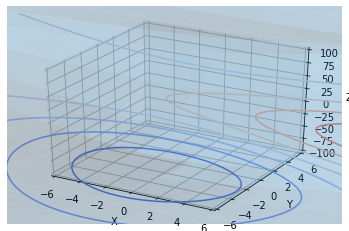

[[-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 ...
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]]


In [14]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-6, 6)
ax.set_ylabel('Y')
ax.set_ylim(-6, 6)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()
print(X)


[[ 8.07261091e-01  9.41437765e-01  9.97705708e-01  9.80850719e-01
   9.02160390e-01  7.77003505e-01  6.22348946e-01  4.54593535e-01
   2.87954298e-01  1.33543814e-01 -8.84706779e-04 -1.10640850e-01
  -1.93431827e-01 -2.48533645e-01 -2.75989644e-01 -2.75989644e-01
  -2.48533645e-01 -1.93431827e-01 -1.10640850e-01 -8.84706779e-04
   1.33543814e-01  2.87954298e-01  4.54593535e-01  6.22348946e-01
   7.77003505e-01  9.02160390e-01  9.80850719e-01  9.97705708e-01
   9.41437765e-01  8.07261091e-01]
 [ 9.41437765e-01  9.98937218e-01  9.71132423e-01  8.69941049e-01
   7.12998635e-01  5.20584150e-01  3.12742785e-01  1.07000578e-01
  -8.30932252e-02 -2.48533645e-01 -3.84629319e-01 -4.90176225e-01
  -5.66292335e-01 -6.15169883e-01 -6.38962142e-01 -6.38962142e-01
  -6.15169883e-01 -5.66292335e-01 -4.90176225e-01 -3.84629319e-01
  -2.48533645e-01 -8.30932252e-02  1.07000578e-01  3.12742785e-01
   5.20584150e-01  7.12998635e-01  8.69941049e-01  9.71132423e-01
   9.98937218e-01  9.41437765e-01]
 [ 9.9

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


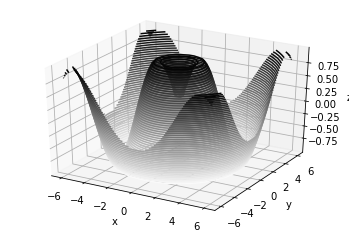

In [15]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

print(Z)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [201]:
plot_data = pd.read_csv('plot.txt', sep=",", header=None) #Reading File Named 'train.txt' with Separator ' '
plot_data.columns = ["x1", "y1"] #Giving Column Names

In [202]:
plot_data

,x1,y1
0,-1.0,-1.0
1,-1.5,-1.5
2,-2.0,-2.0
3,-2.5,-2.5
4,-3.0,-3.0
5,-3.5,-3.5
6,-4.0,-4.0
7,-4.5,-4.5
8,-5.0,-5.0
9,-5.5,-5.5


In [203]:
c=plot_data.shape #Finding The Shape of Train Dataset
print(c[0]) #Printing the  Row Numbers
RowNumber=c[0] #Assigning Row Numbers in RowNumber
PI = 3.14159

coordinates=[]

#Defining 4 Lists for Train Class 1 and Class 2
for i in range(0,RowNumber):
    test_datapoint=np.array([plot_data.at[i,'x1'],plot_data.at[i,'y1']])
    coordinates.append(np.sqrt(det_sigma1/det_sigma2)*(np.exp((-
                        np.dot((test_datapoint - mu1).transpose(), 
                        np.dot(inv_sigma1,(test_datapoint - mu1))))+
                        (np.dot((test_datapoint - mu2).transpose()
                        ,np.dot(inv_sigma2,(test_datapoint - mu2)))))))






22


In [217]:
Yd=np.array(coordinates)
X=plot_data['x1']
Xd=np.array(X)
print(Xd.size)
zd=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
print(zd.size)

22
22


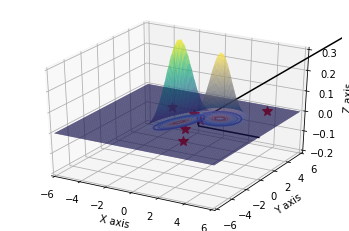

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


x1=np.array(test_data['x1'])
y1=np.array(test_data['y1'])

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-6,6,100)
y = np.linspace(-6,6,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([0, 0], [[.25, .3], [.3, 1]])
rx = multivariate_normal([2, 2], [[.5, 0], [0, .5]])
#Make a 3D plot

fig = plt.figure()
ax= fig.add_subplot(111, projection="3d")





ax.plot_surface(X, Y, rv.pdf(pos), cmap="viridis", lw=0.5, rstride=1, cstride=1, alpha=0.5)

ax.plot_surface(X, Y, rx.pdf(pos), cmap="cividis", lw=0.5, rstride=1, cstride=1, alpha=0.5)

#ax.contour(X, Y, rx.pdf(pos), 10, lw=3,colors="k", linestyles="solid")
#ax.contour(X, Y, rv.pdf(pos), 10, lw=3, colors="k", linestyles="solid")


cset1 = ax.contour(X, Y, rv.pdf(pos), zdir='z', offset=0, cmap=cm.coolwarm)
#cset1 = ax.contour(X, Y, rv.pdf(pos), zdir='x', offset=-6, cmap=cm.coolwarm)
#cset1 = ax.contour(X, Y, rv.pdf(pos), zdir='y', offset=6, cmap=cm.coolwarm)

cset2 = ax.contour(X, Y, rx.pdf(pos), zdir='z', offset=0, cmap=cm.coolwarm)
#cset2 = ax.contour(X, Y, rx.pdf(pos), zdir='x', offset=-6, cmap=cm.coolwarm)
#cset2 = ax.contour(X, Y, rx.pdf(pos), zdir='y', offset=6, cmap=cm.coolwarm)

ax.plot(x1,y1, 'r*', markersize=10,label='Train Class 1')

ax.plot(Xd,Yd,zd,color='black',zdir='z')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-0.2, 0.3)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


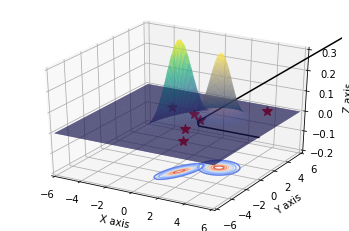

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


x1=np.array(test_data['x1'])
y1=np.array(test_data['y1'])

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-6,6,100)
y = np.linspace(-6,6,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([0, 0], [[.25, .3], [.3, 1]])
rx = multivariate_normal([2, 2], [[.5, 0], [0, .5]])
#Make a 3D plot

fig = plt.figure()
ax= fig.add_subplot(111, projection="3d")





ax.plot_surface(X, Y, rv.pdf(pos), cmap="viridis", lw=0.5, rstride=1, cstride=1, alpha=0.5)

ax.plot_surface(X, Y, rx.pdf(pos), cmap="cividis", lw=0.5, rstride=1, cstride=1, alpha=0.5)

#ax.contour(X, Y, rx.pdf(pos), 10, lw=3,colors="k", linestyles="solid")
#ax.contour(X, Y, rv.pdf(pos), 10, lw=3, colors="k", linestyles="solid")


cset1 = ax.contour(X, Y, rv.pdf(pos), zdir='z', offset=-0.25, cmap=cm.coolwarm)
#cset1 = ax.contour(X, Y, rv.pdf(pos), zdir='x', offset=-6, cmap=cm.coolwarm)
#cset1 = ax.contour(X, Y, rv.pdf(pos), zdir='y', offset=6, cmap=cm.coolwarm)

cset2 = ax.contour(X, Y, rx.pdf(pos), zdir='z', offset=-0.25, cmap=cm.coolwarm)
#cset2 = ax.contour(X, Y, rx.pdf(pos), zdir='x', offset=-6, cmap=cm.coolwarm)
#cset2 = ax.contour(X, Y, rx.pdf(pos), zdir='y', offset=6, cmap=cm.coolwarm)

ax.plot(x1,y1, 'r*', markersize=10,label='Train Class 1')

ax.plot(Xd,Yd,zd,color='black',zdir='z')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-0.2, 0.3)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()